### Machine Learning com Scikit-Learn

Problema de Negócio:

Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Carregando os dados

In [10]:
# carrega o dataset
df = pd.read_csv('dataset_ML.csv')

In [11]:
df.shape

(500, 2)

In [12]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [13]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Análise Exploratória - Resumo Estatístico

In [16]:
# verificando se há valores ausentes
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [17]:
# correlação
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [18]:
# resumo estatístico do dataset
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [19]:
# resumo estatístico da variável preditora (entrada)
df['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

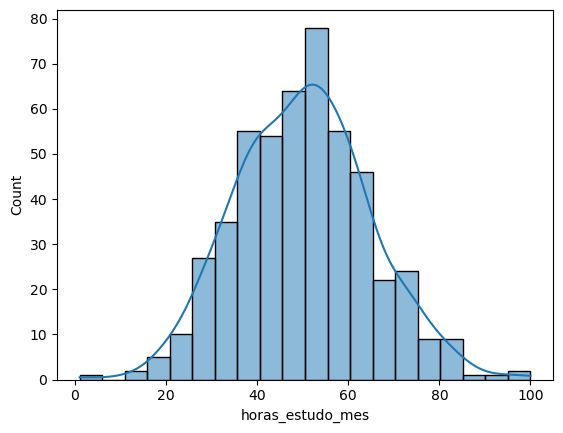

In [21]:
# histograma da variável preditora
sns.histplot(data=df, x='horas_estudo_mes', kde=True);

### Preparação dos Dados

In [22]:
# prepara a variável de entrada (X)
X = np.array(df['horas_estudo_mes'])

In [23]:
type(X)

numpy.ndarray

In [24]:
# ajusta o shape de X
X = X.reshape(-1, 1)

In [25]:
y = df['salario']

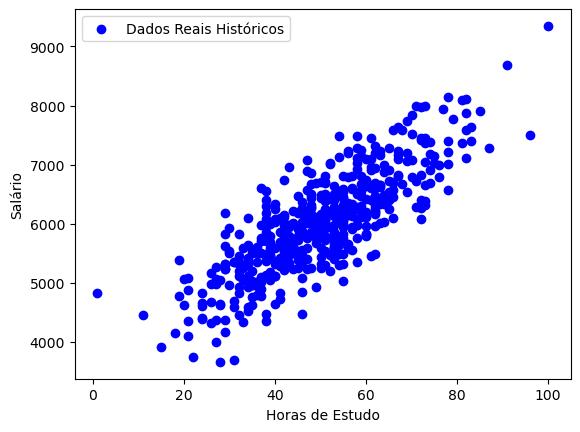

In [26]:
# gráfico de dispersão entre X e y
plt.scatter(X, y, color='blue', label='Dados Reais Históricos')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [28]:
# dividir dados em treinamento e teste (20% para dados de teste, 80% para dados de treino)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_treino.shape

(400, 1)

In [30]:
X_teste.shape

(100, 1)

In [31]:
y_treino.shape

(400,)

In [32]:
y_teste.shape

(100,)

> Tanto o X quanto o y, cada um possui apenas uma coluna. Mas, por que aparece o shape diferente? Porque X está no formato de matriz e y, no formato de vetor.

### Modelagem Preditiva (Machine Learning)

In [33]:
# cria o modelo de regressão linear simples
modelo = LinearRegression()

In [34]:
# treina o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

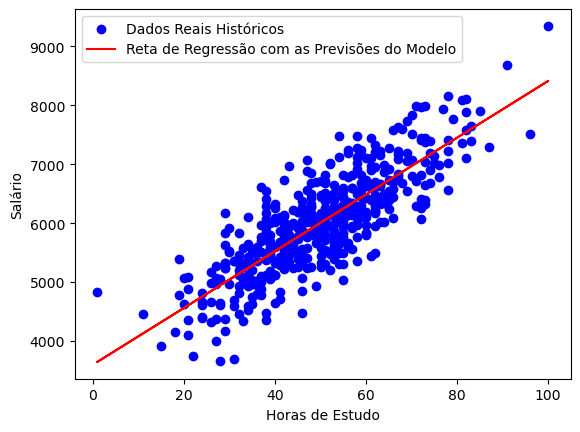

In [35]:
# visualiza a reta de regressão linear (previsões) e os dados reais usando no treinamento
plt.scatter(X, y, color='blue', label='Dados Reais Históricos')
plt.plot(X, modelo.predict(X), color='red', label='Reta de Regressão com as Previsões do Modelo')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [36]:
# avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f'Coeficiente R^2: {score:.2f}')

Coeficiente R^2: 0.59


In [37]:
# intercepto - parâmetro w0
modelo.intercept_

3596.7837243727536

In [38]:
# slope - parâmetro w1
modelo.coef_

array([48.18185277])

### Deploy do Modelo

O modelo será usado para prever o salário com base nas horas de estudo.

In [41]:
# define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

# faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de: {horas_estudo_novo} horas por mês, seu salário pode ser igual a {salario_previsto}')

Se você estudar cerca de: [[48]] horas por mês, seu salário pode ser igual a [5909.5126574]


In [43]:
# mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1 * X (reoroduzindo a equação matemática)
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [44]:
# define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

# faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de: {horas_estudo_novo} horas por mês, seu salário pode ser igual a {salario_previsto}')

Se você estudar cerca de: [[65]] horas por mês, seu salário pode ser igual a [6728.60415452]


In [45]:
# define um novo valor para horas de estudo
horas_estudo_novo = np.array([[73]])

# faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Se você estudar cerca de: {horas_estudo_novo} horas por mês, seu salário pode ser igual a {salario_previsto}')

Se você estudar cerca de: [[73]] horas por mês, seu salário pode ser igual a [7114.05897669]
